#Proyecto de clasificación de un dataset TAA
## Juan Sebastian Garcia 
## Universidad Distrital Francisco Jose de Caldas
Cargamos el dataset disponible en https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data ; Esta base de datos contiene 279 atributos, 206 de los cuales son de valor lineal y el resto son nominales.

El objetivo es distinguir entre la presencia y ausencia de arritmia cardíaca y clasificarla en uno de los 16 grupos. La clase 01 se refiere a ECG 'normal'. Las clases 02 a 15 se refieren a diferentes clases. de arritmia y la clase 16 se refiere al resto de las no clasificadas

In [3]:
#Cargamos los datos de una carpeta local
f_in = open("arrhythmia.data",'r')
arrhythmia = f_in.readlines()
f_in.close()

#Seleccion inicial de columnas
Observando la descripción disponible en: https://archive.ics.uci.edu/ml/datasets/arrhythmia , se elige algunas caracteristicas lineales que posiblemente esten relacionadas con el diagnostico de arritmia cardíaca.

In [46]:
import pandas as pd
import numpy as np

alturas_cm=[]
pesos_kg=[]
Frecuencia_cardiaca=[] #Número de latidos cardíacos por minuto
Num_de_deflex=[]
T = [] #Duración media de la onda T en mseg
P = [] #Duración media de la onda P en mseg
Onda_Q=[] #Ancho promedio, en mseg onda Q
Onda_R=[] #Ancho promedio, en mseg onda R
Onda_S=[] #Ancho promedio, en mseg onda S
P_R = [] #duración promedio entre el inicio de las ondas P y R en mseg
Q_T = [] #duración promedio entre el inicio de Q y el final de las ondas T en mseg
grupos=[]
for renglon in arrhythmia:
  datos_ren_str = renglon.split(',')
  try:
      altura_cm = int(datos_ren_str[2])
      if altura_cm > 200:
        continue
      peso_kg = int(datos_ren_str[3])
      p_r = int(datos_ren_str[5])
      q_t = int(datos_ren_str[6])
      t = int(datos_ren_str[7])
      p = int(datos_ren_str[8])
      frecuencia_cardiaca = int(datos_ren_str[14])
      Onda_q = int(datos_ren_str[15])
      Onda_r = int(datos_ren_str[16])
      Onda_s = int(datos_ren_str[17])
      num_de_deflex = int(datos_ren_str[20]) 
      grupo = int(datos_ren_str[-1])
  except:
     continue
  alturas_cm.append(altura_cm)
  pesos_kg.append(peso_kg)
  Frecuencia_cardiaca.append(frecuencia_cardiaca)
  Num_de_deflex.append(num_de_deflex)
  T.append(t)
  P.append(p)
  Onda_Q.append(Onda_q)
  Onda_R.append(Onda_r)
  Onda_S.append(Onda_s)
  P_R.append(p_r)
  Q_T.append(q_t)
  grupos.append(grupo)

minima,maxima=min(pesos_kg),max(pesos_kg)
peso_car=[int((i-minima)/10) for i in pesos_kg  ]

minima,maxima=min(alturas_cm),max(alturas_cm)
altura_car=[int((i-minima)/10) for i in alturas_cm  ]

minima,maxima=min(Frecuencia_cardiaca),max(Frecuencia_cardiaca)
Frecuencia_cardiaca_car=[int((i-minima)/10) for i in Frecuencia_cardiaca  ]

minima,maxima=min(Num_de_deflex),max(Num_de_deflex)
Num_de_deflex_car=[int((i-minima)/10) for i in Num_de_deflex  ]

minima,maxima=min(T),max(T)
T_car=[int((i-minima)/10) for i in T  ]

minima,maxima=min(P),max(P)
P_car=[int((i-minima)/10) for i in P  ]

minima,maxima=min(Onda_Q),max(Onda_Q)
Onda_Q_car=[int((i-minima)/10) for i in Onda_Q  ]

minima,maxima=min(Onda_R),max(Onda_R)
Onda_R_car=[int((i-minima)/10) for i in Onda_R  ]

minima,maxima=min(Onda_S),max(Onda_S)
Onda_S_car=[int((i-minima)/10) for i in Onda_S  ]

minima,maxima=min(P_R),max(P_R)
P_R_car=[int((i-minima)/10) for i in P_R ]

minima,maxima=min(Q_T),max(Q_T)
Q_T_car=[int((i-minima)/10) for i in Q_T ]

minima,maxima=min(grupos),max(grupos)
grupos_car=[i-1 for i in grupos ]




data = pd.DataFrame(list(zip(altura_car,peso_car,Frecuencia_cardiaca_car,Num_de_deflex_car,T_car,P_car,Onda_Q_car,Onda_R_car,Onda_S_car,P_R_car,Q_T_car,grupos_car)),
                            columns =['alturas_cm', 'pesos_kg','Frecuencia_cardiaca','Num_de_deflex','T','P','Onda_Q','Onda_R','Onda_S','P_R','Q_T','Salida'])
data.head()

,alturas_cm,pesos_kg,Frecuencia_cardiaca,Num_de_deflex,T,P,Onda_Q,Onda_R,Onda_S,P_R,Q_T,Salida
0,8,7,1,3,6,12,0,5,4,19,13,7
1,6,5,0,2,4,3,0,4,0,17,16,5
2,6,8,3,2,7,10,0,4,8,16,14,9
3,7,8,2,4,7,14,0,7,2,20,14,0
4,6,4,4,2,6,9,0,3,4,16,8,13


Selección datos de entrada y salida del dataset creado previamente

In [47]:
X = data.iloc[:,:11]
y = data.iloc[:,-1]
m,n = X.shape
m,n

(449, 11)

In [48]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
np.random.seed(7)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                       X,
                                       y,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((314, 11), (135, 11), (314,), (135,))

#Discriminación de columnas

##Mínimos cuadrados ordinarios (OLS)¶

In [49]:
# Creación y entrenamiento del modelo
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)
coef_OLS = abs(modelo.coef_.flatten())

,alturas_cm,pesos_kg,Frecuencia_cardiaca,Num_de_deflex,T,P,Onda_Q,Onda_R,Onda_S,P_R,Q_T
0,8,7,1,3,6,12,0,5,4,19,13
1,6,5,0,2,4,3,0,4,0,17,16
2,6,8,3,2,7,10,0,4,8,16,14
3,7,8,2,4,7,14,0,7,2,20,14
4,6,4,4,2,6,9,0,3,4,16,8


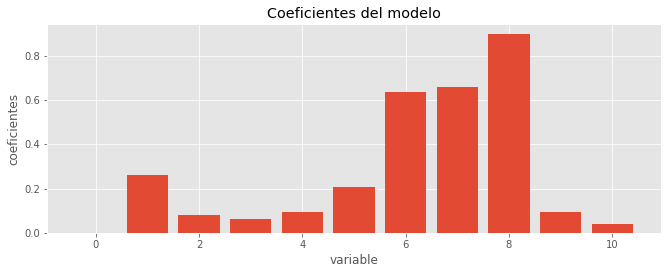

In [50]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.bar(range(n),abs(modelo.coef_.flatten()))
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');
X.head()

In [51]:
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 4.90154288996875


##Ridge (Cresta)

In [52]:
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)
coef_cresta = abs(modelo.coef_.flatten())



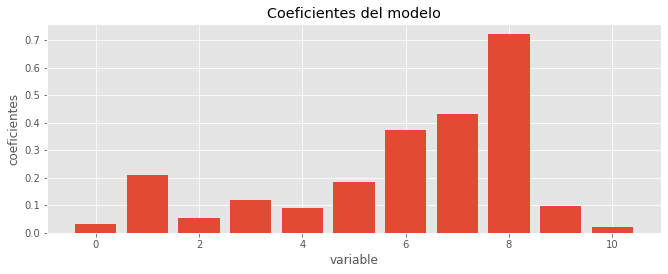

In [53]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.bar(range(n),abs(modelo.coef_.flatten()))
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');


In [54]:
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 4.873398855884026


##LASSO (Least absolute shrinkage and selection operator)

In [10]:
modelo = LassoCV(
             alphas          = np.logspace(-10, 3, 200),
             normalize       = True,
             cv              = 10
          )
_ = modelo.fit(X = X_train, y = y_train)
coef_lasso = abs(modelo.coef_.flatten())

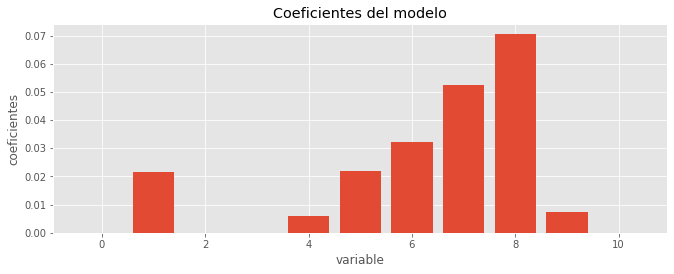

In [11]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.bar(range(n),abs(modelo.coef_.flatten()))
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [58]:
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 4.873398855884026


<BarContainer object of 11 artists>

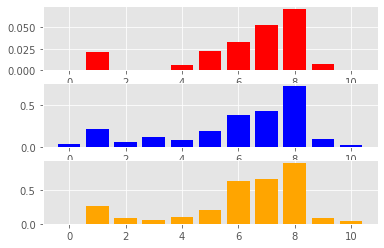

In [59]:
fig, ax = plt.subplots(3)
ax[0].bar(range(n),coef_lasso,color='r')
ax[1].bar(range(n),coef_cresta,color='b')
ax[2].bar(range(n),coef_OLS,color='orange')


**De lo anterior podemos concluir que las columnas 1,4,5,6,7,8,9 son las mas relevantes respecto al dato de salida**, por lo que creamos una copia del Dataset principal, eliminando las columnas ['alturas_cm','Frecuencia_cardiaca','Num_de_deflex','Q_T']

In [60]:
columns2 =['alturas_cm', 'pesos_kg','Frecuencia_cardiaca','Num_de_deflex','T','P',
          'Onda_Q','Onda_R','Onda_S','P_R','Q_T','Salida']
#columns2 = columns2.pop(0)
data2 = data.copy()
data2 = data2.drop(['alturas_cm','Frecuencia_cardiaca','Num_de_deflex','Q_T'],axis=1)
data2

,pesos_kg,T,P,Onda_Q,Onda_R,Onda_S,P_R,Salida
0,7,6,12,0,5,4,19,7
1,5,4,3,0,4,0,17,5
2,8,7,10,0,4,8,16,9
3,8,7,14,0,7,2,20,0
4,4,6,9,0,3,4,16,13
...,...,...,...,...,...,...,...,...
444,6,4,11,0,5,2,19,0
445,7,9,7,0,4,3,13,9
446,5,8,11,1,4,4,17,1
447,4,11,6,0,5,0,10,0


In [66]:
data2
Xf = data2.iloc[:,:7]
yf = data.iloc[:,-1]
Xf

,pesos_kg,T,P,Onda_Q,Onda_R,Onda_S,P_R
0,7,6,12,0,5,4,19
1,5,4,3,0,4,0,17
2,8,7,10,0,4,8,16
3,8,7,14,0,7,2,20
4,4,6,9,0,3,4,16
...,...,...,...,...,...,...,...
444,6,4,11,0,5,2,19
445,7,9,7,0,4,3,13
446,5,8,11,1,4,4,17
447,4,11,6,0,5,0,10


#Metodos de clasificación

##Vecino mas cercano

In [79]:
Xf = data2.iloc[:,:7]
yf = data2.iloc[:,-1]
m,n = Xf.shape
m,n
X_train, X_test, y_train, y_test = train_test_split(
                                       Xf,
                                       yf,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
Xf

,pesos_kg,T,P,Onda_Q,Onda_R,Onda_S,P_R
0,7,6,12,0,5,4,19
1,5,4,3,0,4,0,17
2,8,7,10,0,4,8,16
3,8,7,14,0,7,2,20
4,4,6,9,0,3,4,16
...,...,...,...,...,...,...,...
444,6,4,11,0,5,2,19
445,7,9,7,0,4,3,13
446,5,8,11,1,4,4,17
447,4,11,6,0,5,0,10


In [78]:
from scipy.linalg.decomp_svd import zeros
k_min, err_min = np.inf,np.inf
i = 300
ks, errores = np.zeros(i-1),np.zeros(i-1) # Declaramos los arreglos en donde se van a guardar los valores de k y el error
for k in range(1,i,1):
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error = mean_squared_error(y_test, y_pred)
  ks[k-1] = k # Guardamos los valores de en un arreglo
  errores[k-1] = error # Guardamos los valores de error de cada k en un arreglo
  # Evaluamos el error minimo y guardamos el valor de k de dicho valor
  if error<err_min:
    err_min = error
    kf = k
    rmse_vecinos = mean_squared_error(y_test, y_pred)
print('El minimo error encontrado es',rmse_vecinos,', cuyo valor de k es',kf)
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)
rmse_vecinos = mean_squared_error(y_test, y_pred)
rmse_vecinos

El minimo error encontrado es 23.27678752436647 , cuyo valor de k es 95


23.376704875701535